In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Load dataset

In [2]:
df1 = pd.read_csv('mvp_data.csv', index_col=0).reset_index()
df1.head()

,index,Year,Player,Tm,Share,G,MP,PTS,TRB,AST,...,offensive_win_shares,defensive_win_shares,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,wl_pct,seed,highest_teammate_vorp,highest_teammate_ws
0,0,1980,Kareem Abdul-Jabbar,LAL,0.665,82,38.3,24.8,10.8,4.5,...,9.5,5.3,4.8,2.4,7.2,7.3,0.731707,1,4.8,10.5
1,1,1980,Julius Erving,PHI,0.143,78,36.1,26.9,7.4,4.6,...,7.3,5.2,5.7,1.9,7.6,6.8,0.719512,2,2.9,8.1
2,2,1980,George Gervin,SAS,0.086,78,37.6,33.1,5.2,2.6,...,9.3,1.3,5.5,-1.6,3.9,4.4,0.500000,4,1.5,5.5
3,3,1980,Larry Bird,BOS,0.068,82,36.0,21.3,10.4,4.5,...,5.6,5.6,3.0,1.5,4.5,4.8,0.743902,1,3.8,12.2
4,4,1980,Tiny Archibald,BOS,0.009,80,35.8,14.1,2.5,8.4,...,5.9,2.9,1.4,-0.3,1.1,2.3,0.743902,1,4.8,12.2


In [3]:
drop_cols = ['index']
df = df1.drop(drop_cols, axis=1)
df.head()

,Year,Player,Tm,Share,G,MP,PTS,TRB,AST,STL,...,offensive_win_shares,defensive_win_shares,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,wl_pct,seed,highest_teammate_vorp,highest_teammate_ws
0,1980,Kareem Abdul-Jabbar,LAL,0.665,82,38.3,24.8,10.8,4.5,1.0,...,9.5,5.3,4.8,2.4,7.2,7.3,0.731707,1,4.8,10.5
1,1980,Julius Erving,PHI,0.143,78,36.1,26.9,7.4,4.6,2.2,...,7.3,5.2,5.7,1.9,7.6,6.8,0.719512,2,2.9,8.1
2,1980,George Gervin,SAS,0.086,78,37.6,33.1,5.2,2.6,1.4,...,9.3,1.3,5.5,-1.6,3.9,4.4,0.500000,4,1.5,5.5
3,1980,Larry Bird,BOS,0.068,82,36.0,21.3,10.4,4.5,1.7,...,5.6,5.6,3.0,1.5,4.5,4.8,0.743902,1,3.8,12.2
4,1980,Tiny Archibald,BOS,0.009,80,35.8,14.1,2.5,8.4,1.3,...,5.9,2.9,1.4,-0.3,1.1,2.3,0.743902,1,4.8,12.2


### Select numeric columns for correlation study

In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include=numerics)

<AxesSubplot:>

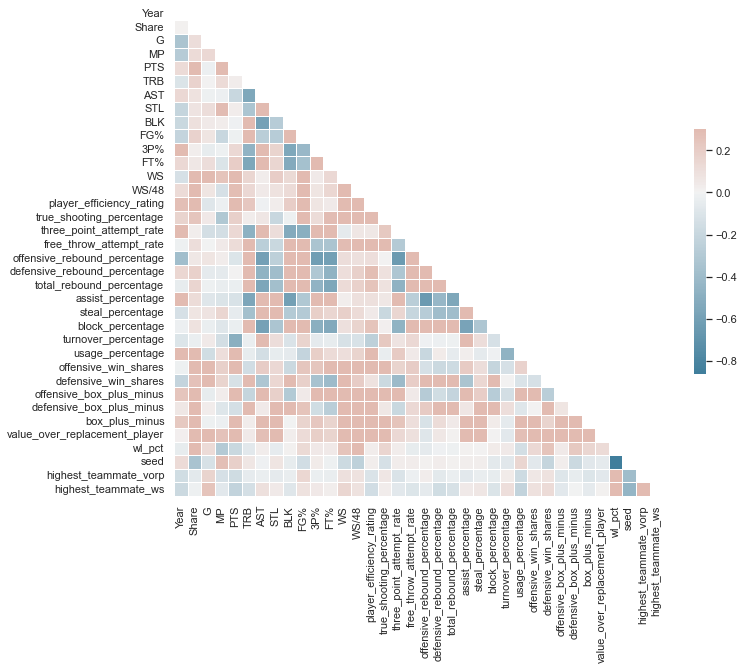

In [5]:
# Compute the correlation matrix
corr = num_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
corr['Share'].sort_values(ascending=False)

Share                            1.000000
value_over_replacement_player    0.609648
WS/48                            0.601676
WS                               0.594909
box_plus_minus                   0.592454
player_efficiency_rating         0.587122
offensive_box_plus_minus         0.517377
offensive_win_shares             0.493071
wl_pct                           0.376641
PTS                              0.372642
defensive_box_plus_minus         0.323435
usage_percentage                 0.308277
defensive_win_shares             0.266976
true_shooting_percentage         0.241437
defensive_rebound_percentage     0.177382
TRB                              0.171994
FG%                              0.171537
total_rebound_percentage         0.157097
MP                               0.122162
assist_percentage                0.115746
free_throw_attempt_rate          0.112761
G                                0.108894
BLK                              0.092065
block_percentage                 0

### study correlation for candidates with above 0.35 share

<AxesSubplot:>

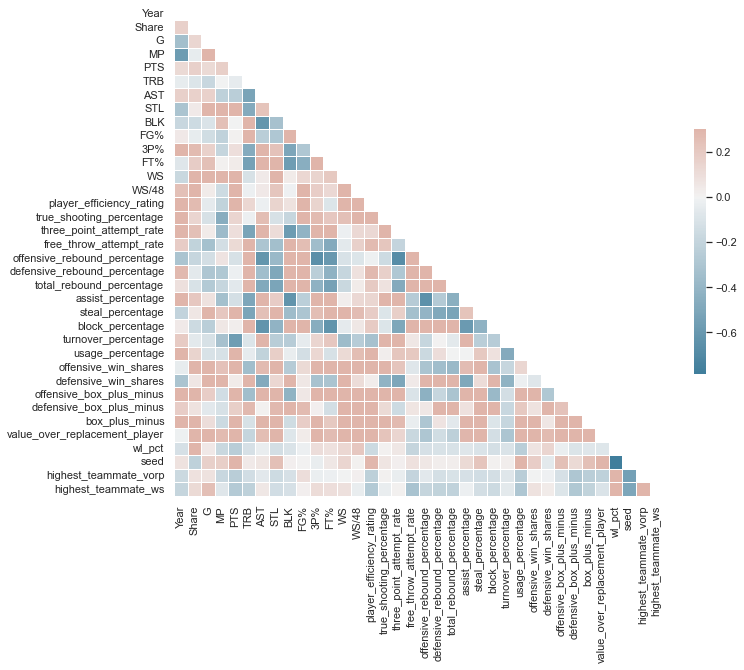

In [7]:
num_df2 = num_df[num_df['Share'] > 0.5]
# Compute the correlation matrix
corr = num_df2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
corr['Share'].sort_values(ascending=False)

Share                            1.000000
wl_pct                           0.431053
WS/48                            0.384682
offensive_box_plus_minus         0.366412
WS                               0.340325
offensive_win_shares             0.336560
box_plus_minus                   0.312578
value_over_replacement_player    0.299961
3P%                              0.270806
player_efficiency_rating         0.266833
three_point_attempt_rate         0.245838
assist_percentage                0.207330
FT%                              0.184057
PTS                              0.166445
Year                             0.165394
AST                              0.161339
usage_percentage                 0.145449
true_shooting_percentage         0.143247
G                                0.136640
highest_teammate_ws              0.117440
highest_teammate_vorp            0.081204
defensive_box_plus_minus         0.074001
steal_percentage                 0.056924
defensive_win_shares             0

In [9]:
fig = px.scatter(df, x="wl_pct", y="value_over_replacement_player",color='MVP', hover_data=['Player', 'Year'])
fig.update_layout(height=600, title_text= 'VORP vs W/L % Pct for MVP Candiates')
fig.show()

In [10]:
fig = px.scatter(df, x="wl_pct", y="WS/48",color='MVP', hover_data=['Player', 'Year'])
fig.update_layout(height=600, title_text= 'Win Shares per 48 vs W/L % Pct for MVP Candiates')
fig.show()

In [18]:
years_to_plot = [1999, 1982, 2006, 2011]
df99 = df[df['Year']==1999]
df05 = df[df['Year']==2005]
df06 = df[df['Year']==2006]
df11 = df[df['Year']==2011]
df82 = df[df['Year']==1982]

fig = make_subplots(rows=2, cols=2, subplot_titles=[f'{year}' for year in years_to_plot], start_cell="bottom-left")

#fig.add_trace(go.Scatter(x=df99["wl_pct"], y=df99["WS/48"],mode='markers', marker_color=df99['Share'], text=df99['Player']), row=1, col=1)
fig.add_trace(go.Scatter(x=df99["wl_pct"], y=df99["WS/48"],mode='markers', marker=dict(color=df99['Share'], colorscale='Viridis', showscale=True), 
                text=df99['Player']), row=1, col=1)
fig.add_trace(go.Scatter(x=df82["wl_pct"], y=df82["WS/48"], mode='markers',marker=dict(color=df82['Share'], colorscale='Viridis', showscale=True), text=df82['Player']), row=2, col=1)
fig.add_trace(go.Scatter(x=df06["wl_pct"], y=df06["WS/48"], mode='markers',marker=dict(color=df06['Share'], colorscale='Viridis', showscale=True), text=df06['Player']), row=1, col=2)
fig.add_trace(go.Scatter(x=df11["wl_pct"], y=df11["WS/48"],mode='markers', marker=dict(color=df11['Share'], colorscale='Viridis', showscale=True), text=df11['Player']), row=2, col=2)

#for i, year in enumerate(years_to_plot, start=1):
    #subplot_df = df[df['Year'] == year]
    #scatter_fig = px.scatter(subplot_df, x="wl_pct", y="WS/48", color='MVP', hover_data=['Player', 'Year'])
    #fig.add_trace(scatter_fig['data'][0], row=i // 2 + 1, col=i % 2 + 1)

fig.update_layout(height=800, title_text='Win Shares per 48 vs W/L % Pct for MVP Candidates (Subplots)', showlegend=False)
fig.show()

In [12]:
fig = make_subplots(rows=2, cols=2, subplot_titles=[f'{year}' for year in years_to_plot], start_cell="bottom-left")

#fig.add_trace(go.Scatter(x=df99["wl_pct"], y=df99["WS/48"],mode='markers', marker_color=df99['Share'], text=df99['Player']), row=1, col=1)
fig.add_trace(go.Scatter(x=df99["wl_pct"], y=df99["value_over_replacement_player"],mode='markers', marker=dict(color=df99['Share'], colorscale='Viridis', showscale=True), 
                text=df99['Player']), row=1, col=1)
fig.add_trace(go.Scatter(x=df05["wl_pct"], y=df05["value_over_replacement_player"], mode='markers',marker=dict(color=df05['Share'], colorscale='Viridis', showscale=True), text=df05['Player']), row=2, col=1)
fig.add_trace(go.Scatter(x=df06["wl_pct"], y=df06["value_over_replacement_player"], mode='markers',marker=dict(color=df06['Share'], colorscale='Viridis', showscale=True), text=df06['Player']), row=1, col=2)
fig.add_trace(go.Scatter(x=df11["wl_pct"], y=df11["value_over_replacement_player"],mode='markers', marker=dict(color=df11['Share'], colorscale='Viridis', showscale=True), text=df11['Player']), row=2, col=2)

#for i, year in enumerate(years_to_plot, start=1):
    #subplot_df = df[df['Year'] == year]
    #scatter_fig = px.scatter(subplot_df, x="wl_pct", y="WS/48", color='MVP', hover_data=['Player', 'Year'])
    #fig.add_trace(scatter_fig['data'][0], row=i // 2 + 1, col=i % 2 + 1)

fig.update_layout(height=800, title_text='VORP vs W/L % Pct for MVP Candidates (Subplots)', showlegend=False)
fig.show()

In [13]:
fig = make_subplots(rows=2, cols=2, subplot_titles=[f'{year}' for year in years_to_plot], start_cell="bottom-left")

#fig.add_trace(go.Scatter(x=df99["wl_pct"], y=df99["WS/48"],mode='markers', marker_color=df99['Share'], text=df99['Player']), row=1, col=1)
fig.add_trace(go.Scatter(x=df99["wl_pct"], y=df99["value_over_replacement_player"],mode='markers', marker=dict(color=df99['Share'], colorscale='Viridis', showscale=True), 
                text=df99['Player']), row=1, col=1)
fig.add_trace(go.Scatter(x=df05["wl_pct"], y=df05["value_over_replacement_player"], mode='markers',marker=dict(color=df05['Share'], colorscale='Viridis', showscale=True), text=df05['Player']), row=2, col=1)
fig.add_trace(go.Scatter(x=df06["wl_pct"], y=df06["value_over_replacement_player"], mode='markers',marker=dict(color=df06['Share'], colorscale='Viridis', showscale=True), text=df06['Player']), row=1, col=2)
fig.add_trace(go.Scatter(x=df11["wl_pct"], y=df11["value_over_replacement_player"],mode='markers', marker=dict(color=df11['Share'], colorscale='Viridis', showscale=True), text=df11['Player']), row=2, col=2)

#for i, year in enumerate(years_to_plot, start=1):
    #subplot_df = df[df['Year'] == year]
    #scatter_fig = px.scatter(subplot_df, x="wl_pct", y="WS/48", color='MVP', hover_data=['Player', 'Year'])
    #fig.add_trace(scatter_fig['data'][0], row=i // 2 + 1, col=i % 2 + 1)

fig.update_layout(height=800, title_text='VORP vs W/L % Pct for MVP Candidates (Subplots)', showlegend=False)
fig.show()

In [14]:
fig = px.scatter(df, x="seed", y="WS/48",color='MVP', hover_data=['Player', 'Year'])
fig.update_layout(height=600, title_text= 'Win Shares per 48 vs Seed for MVP Candiates')
fig.show()

In [15]:
fig = px.scatter(df, x="wl_pct", y="player_efficiency_rating",color='MVP', hover_data=['Player', 'Year', 'Tm'])
fig.update_layout(height=600, title_text= 'PER vs W/L pct for MVP Candiates')
fig.show()

In [16]:
fig = px.scatter(df, x="wl_pct", y="box_plus_minus",color='MVP', hover_data=['Player', 'Year', 'Tm'])
fig.update_layout(height=600, title_text= 'Box Plus-Minus vs W/L pct for MVP Candiates')
fig.show()

In [17]:
fig = px.scatter(df, x="WS", y="player_efficiency_rating",color='MVP', hover_data=['Player', 'Year'])
fig.update_layout(height=600, title_text= 'Win Shares per 48 vs W/L % Pct for MVP Candiates')
fig.show()